# Fitting a Decaying Oscillation

In this notebook you will fit a dataset to a non-linear model that has a decaying oscillation.

## Imports

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [39]:
def yt(t, A, lamda, omega, delt):
    return A*np.exp(-lamda*t) * np.cos(omega*t+delt)

<Container object of 3 artists>

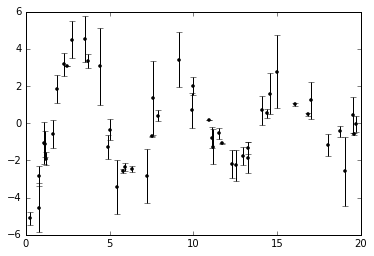

In [40]:
decay_file = np.load('decay_osc.npz')
tdata = decay_file['tdata']
ydata = decay_file['ydata']
dy = decay_file['dy']

plt.errorbar(tdata,ydata,fmt = 'k.', yerr=dy)

Now, using `scipy.optimize.curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

__What would be a good guess for p0?__

In [58]:
estimates, uncertainties = opt.curve_fit(yt, tdata, ydata, absolute_sigma=True)

In [59]:
estimates

array([-5.22512656,  0.07323666,  1.01409163,  6.26632736])

In [60]:
uncertainties

array([[  2.97521698e-01,  -6.17931049e-03,   1.84916857e-03,
         -1.46175297e-02],
       [ -6.17931049e-03,   2.27697231e-04,  -4.82988275e-05,
          3.45719688e-04],
       [  1.84916857e-03,  -4.82988275e-05,   1.84078496e-04,
         -9.30483841e-04],
       [ -1.46175297e-02,   3.45719688e-04,  -9.30483841e-04,
          8.37797276e-03]])

In [45]:
print('A = {0:.3f} +/- {1:.3f}'.format(estimates[0], np.sqrt(uncertainties[0,0])))
print('lambda = {0:.3f} +/- {1:.3f}'.format(estimates[1], np.sqrt(uncertainties[1,1])))
print('omega = {0:.3f} +/- {1:.3f}'.format(estimates[2], np.sqrt(uncertainties[2,2])))
print('delta = {0:.3f} +/- {1:.3f}'.format(estimates[3], np.sqrt(uncertainties[3,3])))

A = -5.225 +/- 0.454
lambda = 0.073 +/- 0.013
omega = 1.014 +/- 0.011
delta = 6.266 +/- 0.076


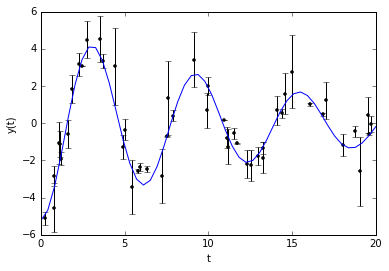

In [61]:
xfit = np.linspace(0,20)
yfit = yt(xfit, estimates[0], estimates[1], estimates[2], estimates[3])
plt.errorbar(tdata,ydata,fmt = 'k.', yerr=dy)
plt.plot(xfit, yfit)
plt.xlabel('t')
plt.ylabel('y(t)');